# The radial metallicity relation in simulated data

In [13]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy.io import fits
from sklearn.linear_model import LinearRegression

In [2]:
# loading file
hdul = fits.open('data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits')
header = hdul[1].header
data = hdul[1].data
hdul.close()

# get data into dataframe and add column R_gal
data = data.view(np.recarray)
df = pd.DataFrame(data=[data.x, data.y, data.z, data.A_O]).T
df.columns = ['x', 'y', 'z', 'A_O']
df['R_gal'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

Plotting figure:

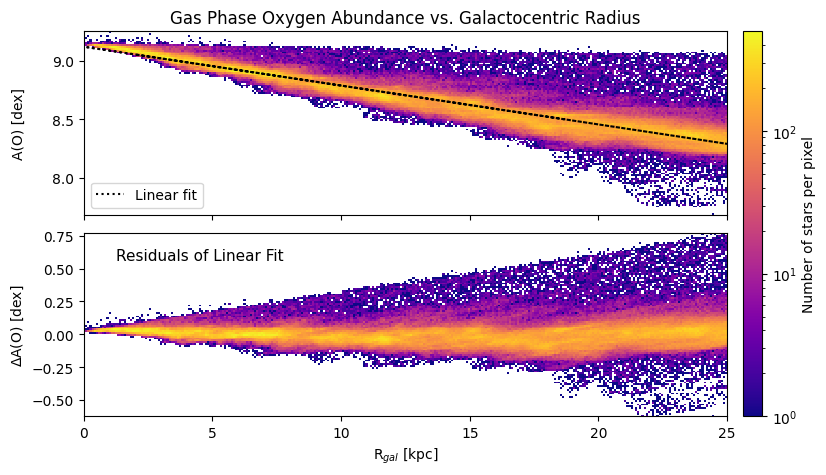

In [65]:
# define axes variables
x = df['R_gal']
y = df['A_O']

# find linear fit and residuals
lr = LinearRegression()
lr.fit(x.values.reshape(-1,1), y)
y_pred = lr.predict(x.values.reshape(-1,1))
res = y - y_pred

# plotting
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharex=True)
plt.subplots_adjust(hspace=0.1)

ax[0].hist2d(x, y, bins=(300,100), cmap='plasma', norm=mpl.colors.LogNorm())
ax[0].plot(x, y_pred, 'k:', label='Linear fit')
ax[0].set_ylabel('A(O) [dex]')
ax[0].legend(loc='lower left')
ax[0].set_title('Gas Phase Oxygen Abundance vs. Galactocentric Radius')

ax[1].hist2d(x, res, bins=(300,100), cmap='plasma', norm=mpl.colors.LogNorm())
ax[1].text(0.05, 0.85, 'Residuals of Linear Fit', transform=ax[1].transAxes, ha='left', fontsize=11)
ax[1].set_ylabel(r'$\Delta$A(O) [dex]')
ax[1].set_xlabel(r'R$_{gal}$ [kpc]')
ax[1].set_xlim(0,25)

fig.align_ylabels(ax)
cbar = fig.colorbar(ax[0].collections[0], ax=ax.ravel().tolist(), 
                   label='Number of stars per pixel', pad=0.02)

plt.savefig('figures/rgal_vs_ao.png')